# 6.6. Sourcing & Analyzing Time Series Data - Personal Saving Rate

### This script contains the following:


#### 0. Explaining "Parsonal Saving Rate"

#### 1. Importing your libraries and data

#### 2. Subsetting, wrangling, and cleaning time-series data¶

#### 3. Time series analysis: decomposition

#### 4. Testing for stationarity

#### 5. Stationarizing the Federal Reserve Economic Data

#### 0. Explaining "Personal Saving Rate"


##### The personal saving rate in the United States is a measure of the amount of money that individuals or households save as a percentage of their disposable personal income.

##### Disposable personal income is the income that households receive from all sources, including wages, salaries, government benefits, and investment income, minus taxes and other deductions.

##### The personal saving rate is calculated by dividing personal savings by disposable personal income and is an important economic indicator as it reflects the level of financial security of individuals and households.

##### Displaying Personal Saving Rate and Unemployment Rate on a single time series chart, should give a very detailed insight, how these variables correlate with each other.

##### Hypothesis:    The higher the Unemployment Rate the higher the Personal Saving Rate should be due to economic uncertainty. 
#####                          Therefore, during financial crises around 2009, the Personal Saving Rate should have been high.

### 1. Importing your libraries and data

Before you start this analysis, you'll need a new library you haven't installed before—Quandl. Install Quandl using conda:

`conda install quandl`

In [64]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('seaborn-poster') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [65]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [66]:
# Configure API key 

quandl.ApiConfig.api_key = 'Mor7H11Vih3mNguHwke_'

In [67]:
# Importing the Federal Reserve Economic Data "Natural Rate of Unemployment" variable.

data = quandl.get('FRED/PSAVERT')

In [68]:
data.head(5)

,Value
Date,
1959-01-01,11.3
1959-02-01,10.6
1959-03-01,10.3
1959-04-01,11.2
1959-05-01,10.6


In [69]:
data.shape

(756, 1)

In [70]:
data.columns

Index(['Value'], dtype='object')

In [71]:
data.describe()

,Value
count,756.000000
mean,8.928704
std,3.216610
min,2.100000
25%,6.600000
50%,8.700000
75%,11.225000
max,33.800000


In [72]:
type(data)

pandas.core.frame.DataFrame

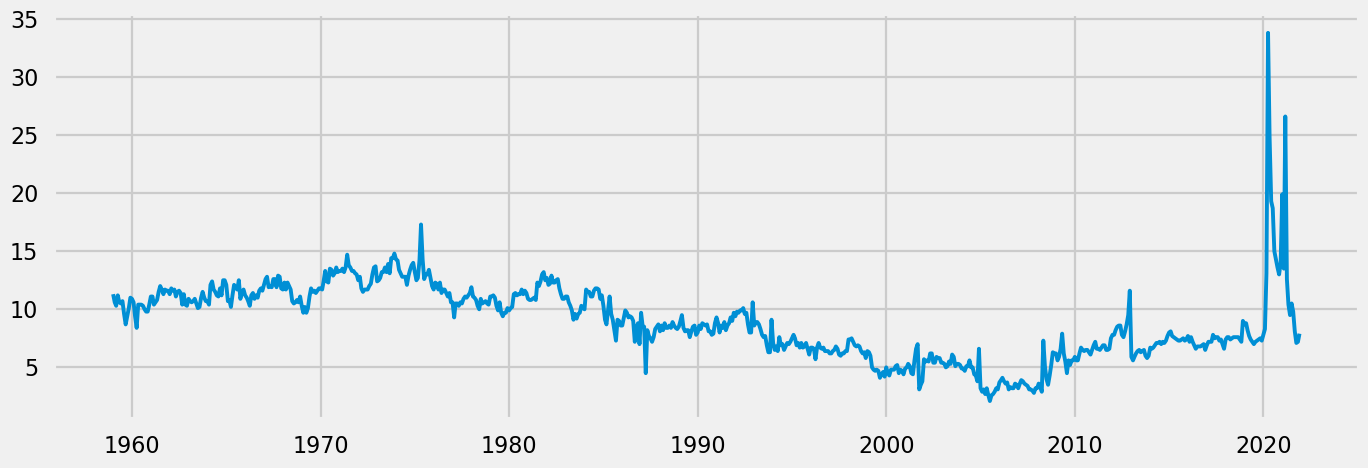

In [73]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) 

# The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(data)

#### Directions 1: Quandl Library installed in Jupyter after registration at Quandl (Nasdaq). 

### Direction 1: Quandl Library installed in Jupyter after registration at Quandl (Nasdaq Data Link)

### Direction 2: Imported best suitable data, the Personal Saving Rate in US since 1959, which fits exactly to my main data containing Unemployment Rate in US since 1976. The common key between these two datasets is the Date on monthly basis.

### 2. Subsetting, wrangling, and cleaning time-series data

In [74]:
# Reset index so that you can use the "Date" column as a filter

data_2 = data.reset_index()

In [75]:
data_2.head()

,Date,Value
0,1959-01-01,11.3
1,1959-02-01,10.6
2,1959-03-01,10.3
3,1959-04-01,11.2
4,1959-05-01,10.6


In [96]:
data_2.tail()

,Date,Value
751,2021-08-01,9.8
752,2021-09-01,8.1
753,2021-10-01,7.1
754,2021-11-01,7.2
755,2021-12-01,7.9


In [97]:
data_sub = data_2.loc[(data_2['Date'] >= '1976-01-01') & (data_2['Date'] < '2021-12-01')]

In [98]:
data_sub.shape

(551, 2)

In [99]:
data_sub.head()

,Date,Value
204,1976-01-01,11.7
205,1976-02-01,12.3
206,1976-03-01,12.2
207,1976-04-01,11.7
208,1976-05-01,12.3


### Direction 3: Subset of this dataset is required, because the main dataset starts in 1976 see above and below the reset of index, which leads to a new dataframe.

In [100]:
# Set the "Date" column as the index

from datetime import datetime

data_sub['datetime'] = pd.to_datetime(data_sub['Date']) # Create a datetime column from "Date.""
data_sub = data_sub.set_index('datetime') # Set the datetime as the index of the dataframe.
data_sub.drop(['Date'], axis=1, inplace=True) # Drop the "Date" column.
data_sub.head()

,Value
datetime,
1976-01-01,11.7
1976-02-01,12.3
1976-03-01,12.2
1976-04-01,11.7
1976-05-01,12.3


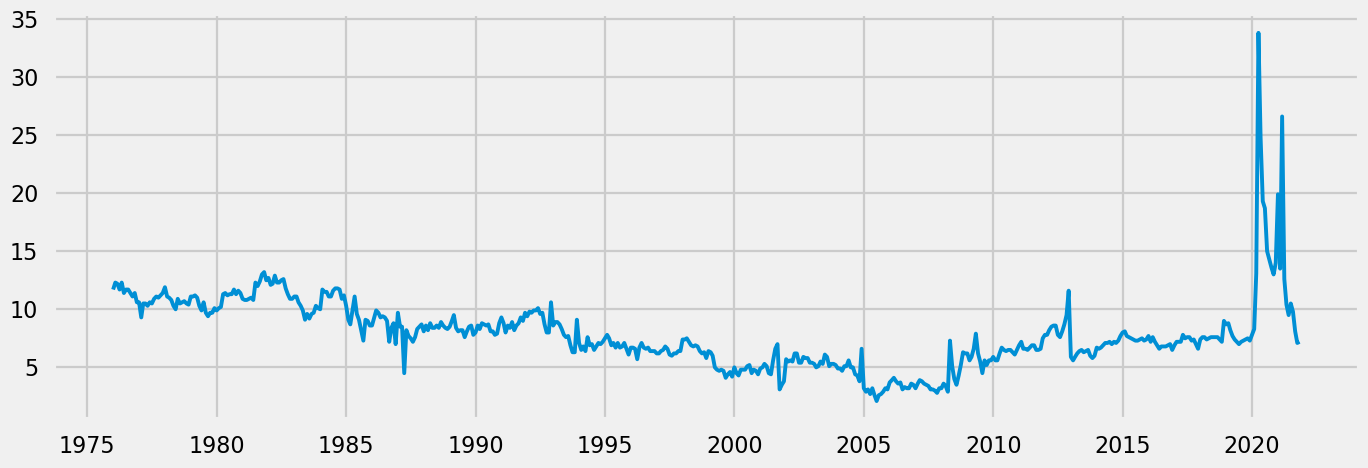

In [101]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_sub)

In [102]:
# Check for missing values (you shouldn't have any)

data_sub.isnull().sum() 

Value    0
dtype: int64

In [103]:
# Check for duplicates

dups = data_sub.duplicated()
dups.sum()

# No dups!

433

### Direction 4: Line chart created and checked the data for missing values or duplictes. 

### 3. Time-series analysis: decomposition

In [104]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(data_sub, model='additive')

In [105]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

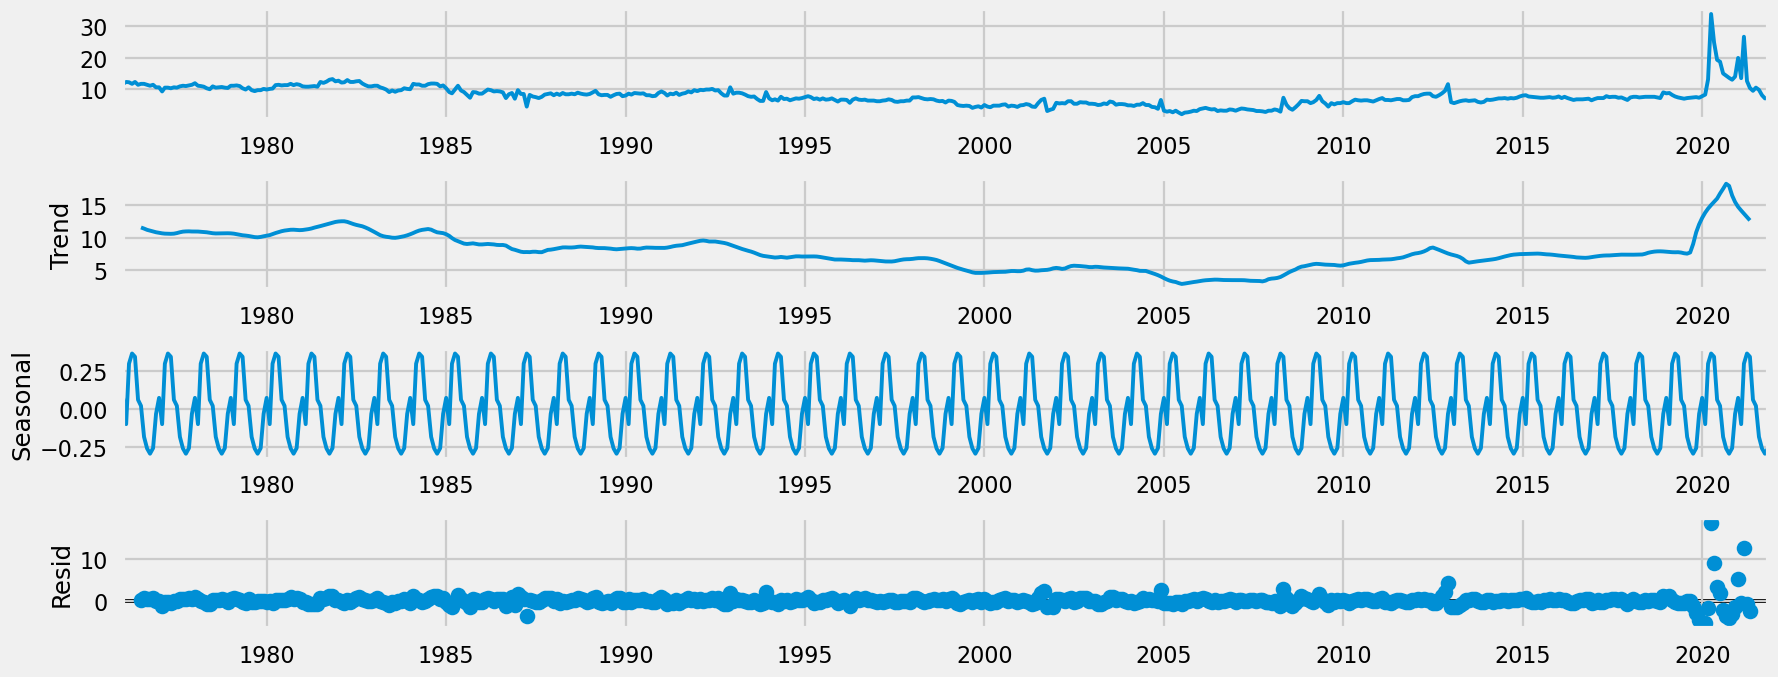

In [106]:
# Plot the separate components

decomposition.plot()
plt.show()

### Direction 5:

#### a) Using additive model for decomposition, because the Personal Saving Rate (PSR) doesn't increase exponentially, but linear. The chart on top is the original data (also known as "Level"). 2nd chart shows the trend, which is an indication, that this series is non-stationary. Confirmed by the down trend until 2006 and increasing trend after 2006. 3rd chart shows the seasonality, which is also an indication about non-stationarity of this time series. Last but not least is the noise of the data named as "Residual", the left data after extracting trend and seasonality. Read interpretation in next paragraph below.

#### b) The period between 2020 until end of 2021 was noisy due to the economic uncertainty also due to strict lockdown regulations during the covid-19 pandemy. People stopped their unnecessary expenditures and started saving money at the beginning of the pandemy and once the lockdowns were lifted by in 2021 the personal savings were reduced. People started to live a normal life again, which very visible on this chart. Not to forget the high increase of Unemployment right after the pandemy started.


### 4. Testing for stationarity

In [107]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data_sub['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                  -1.501820
p-value                          0.532611
Number of Lags Used             19.000000
Number of Observations Used    531.000000
Critical Value (1%)             -3.442725
Critical Value (5%)             -2.866998
Critical Value (10%)            -2.569677
dtype: float64


### Direction 6: 


#### Checking the stationarity of this time series by using the Dickey-Fully test. 

#### Null-Hypothesis: Disproving null-hypothesis means series is non-stationary, therefore not useable for forecasting.

#### Test Statistic is larger than the Critical values (-1.7 vs. -2.8) => can't reject null hypothesis

### Direction 6:

#### Checking the stationarity of this time series by using the Dickey-Fully test.
#### Null-Hypothesis: Disproving null-hypothesis means series is stationary, therefore useable for forecasting.
#### Test Statistic is larger than the Critical values (-1.7 vs. -2.8) => can't reject null hypothesis

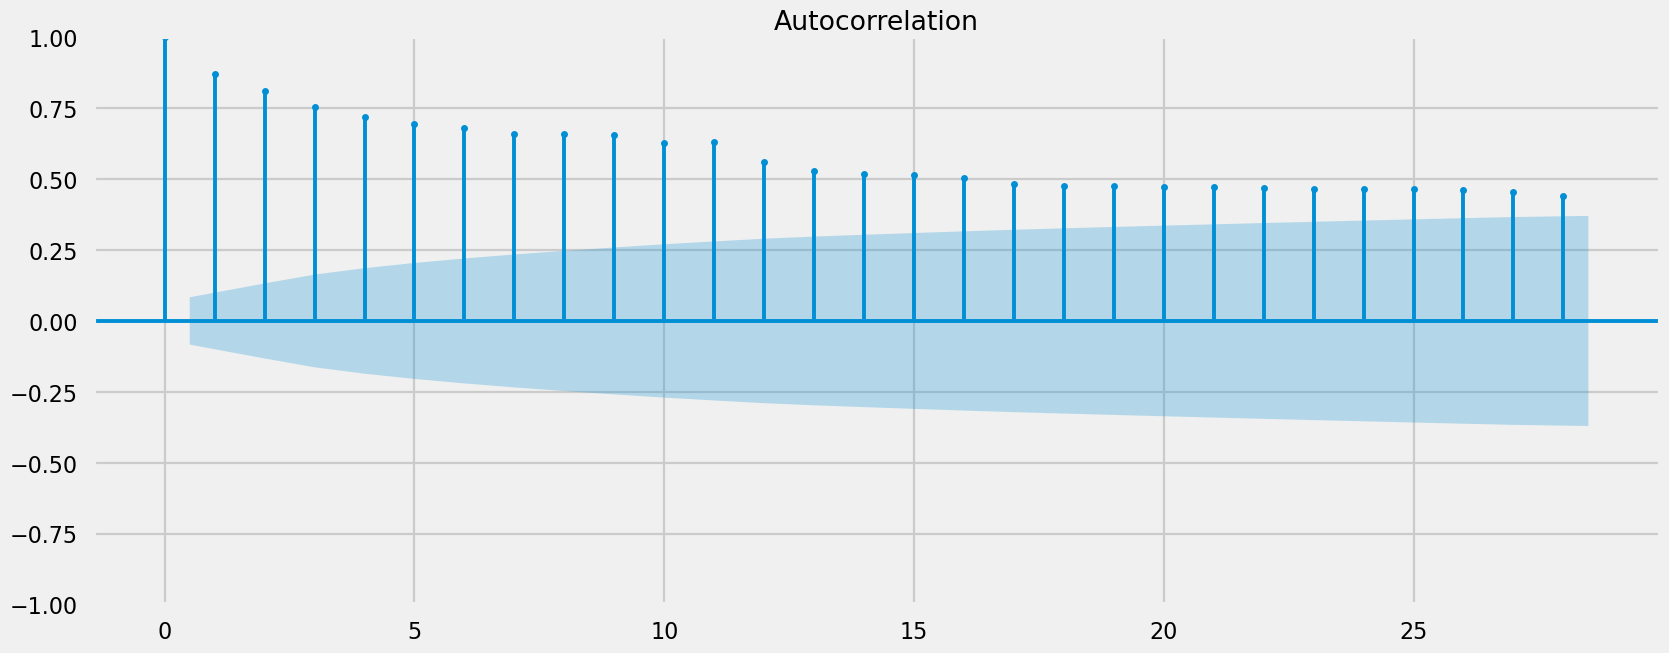

In [108]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(data_sub)
plt.show()

### 5. Stationarizing the Federal Reserve Economic Data

In [109]:
data_diff = data_sub - data_sub.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [110]:
data_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

### Direction 7:

#### Data is non-stationary and now trying to make it stationary by changing the data as done above.¶
#### A new data frame is created by calculating deviation values between current and previous value.



In [111]:
data_diff.head()

,Value
datetime,
1976-02-01,0.6
1976-03-01,-0.1
1976-04-01,-0.5
1976-05-01,0.6
1976-06-01,-0.9


In [112]:
data_diff.columns

Index(['Value'], dtype='object')

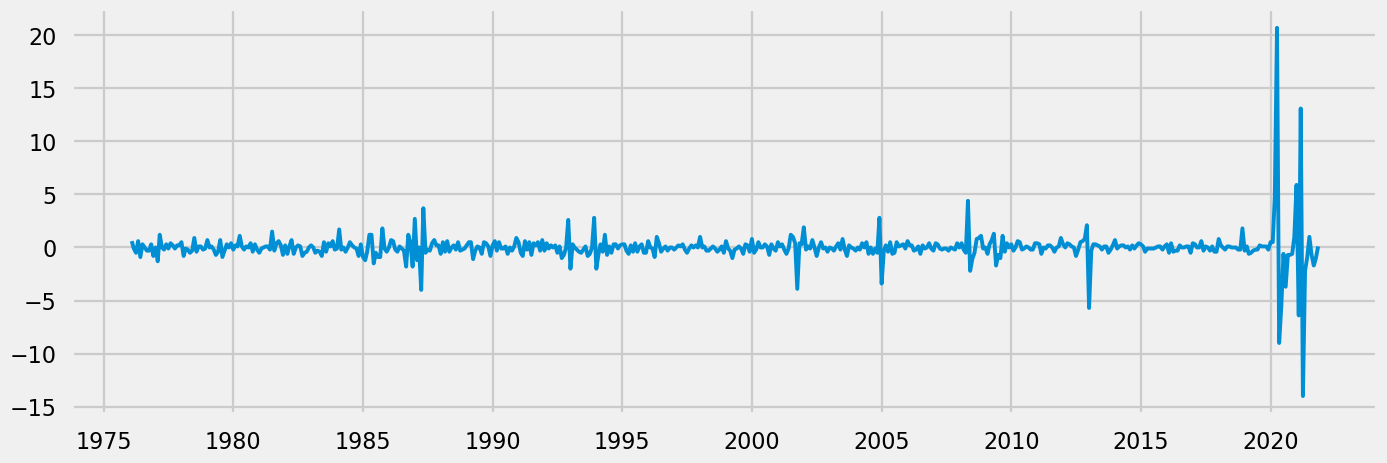

In [113]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [114]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -7.139904e+00
p-value                        3.345155e-10
Number of Lags Used            1.800000e+01
Number of Observations Used    5.310000e+02
Critical Value (1%)           -3.442725e+00
Critical Value (5%)           -2.866998e+00
Critical Value (10%)          -2.569677e+00
dtype: float64


### Direction 8:

#### Test Statistic is smaller than Critical Values => can reject null hypothesis => time series is still non-stationary


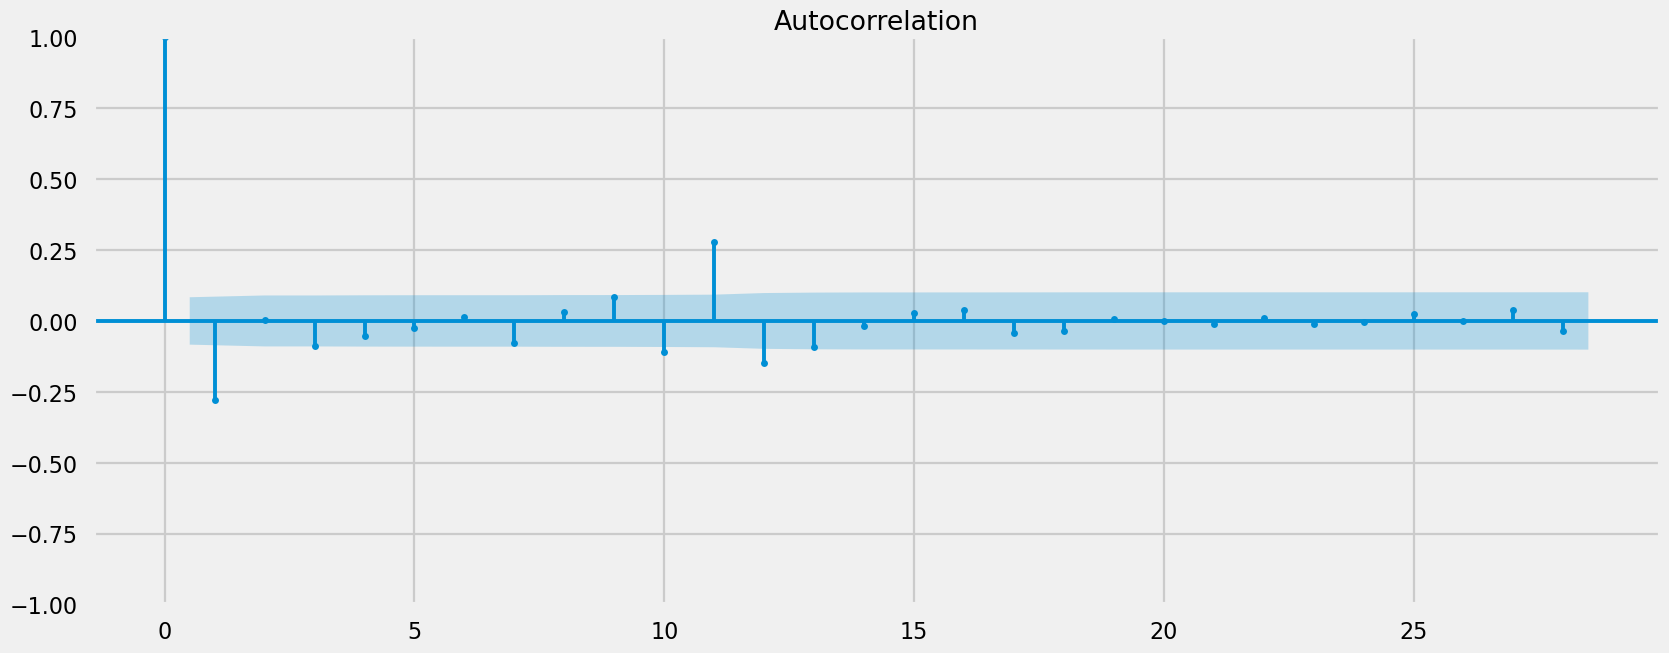

In [115]:
plot_acf(data_diff)
plt.show()

### Direction 9:

#### Comparing the autocorrelation before and after the stationarizing, we can see that the vertical lines are within the confidence interval. In the chart above has a lot of autocorrelated data, which means that time series is non-stationary.